In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('Indicadores_municipales_sabana_DA.csv', index_col=0, encoding='latin-1')
df

,nom_ent,mun,clave_mun,nom_mun,pobtot_ajustada,pobreza,pobreza_e,pobreza_m,vul_car,vul_ing,...,pobreza_alim_10,pobreza_cap_90,pobreza_cap_00,pobreza_cap_10,pobreza_patrim_90,pobreza_patrim_00,pobreza_patrim_10,gini_90,gini_00,gini_10
ent,,,,,,,,,,,,,,,,,,,,,
1,Aguascalientes,1,1001,Aguascalientes,794304,30.531104,2.264478,28.266627,27.983320,8.419106,...,11.805700,20.4,12.7,18.474600,43.4,33.7,41.900398,0.473,0.425,0.422628
1,Aguascalientes,2,1002,Asientos,48592,67.111172,8.040704,59.070468,22.439389,5.557604,...,21.993299,39.9,29.0,30.980801,64.2,48.9,59.175800,0.379,0.533,0.343879
1,Aguascalientes,3,1003,Calvillo,53104,61.360527,7.241238,54.119289,29.428583,2.921336,...,19.266800,39.5,33.1,28.259199,63.9,57.9,56.504902,0.414,0.465,0.386781
1,Aguascalientes,4,1004,Cosío,14101,52.800458,4.769001,48.031458,27.128568,7.709276,...,14.303200,35.2,21.0,22.386101,59.7,40.1,51.164501,0.392,0.541,0.344984
1,Aguascalientes,5,1005,Jesús María,101379,45.338512,6.084037,39.254475,26.262912,8.279864,...,15.085100,36.6,22.6,22.139999,60.6,42.2,45.703899,0.391,0.469,0.458083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,Zacatecas,54,32054,Villa Hidalgo,21016,74.848837,12.301183,62.547654,19.229856,3.177689,...,30.055300,51.8,54.8,41.368999,73.5,70.9,70.859596,0.403,0.589,0.342037
32,Zacatecas,55,32055,Villanueva,27385,65.450191,10.203506,55.246687,23.623556,5.007426,...,13.138800,34.2,25.9,20.563601,57.8,44.1,46.659199,0.422,0.463,0.362527
32,Zacatecas,56,32056,Zacatecas,117528,29.541959,3.535624,26.006335,16.644262,8.828019,...,7.164800,15.7,20.7,12.115300,36.6,41.8,32.302700,0.528,0.498,0.436339


In [3]:
columns_to_remove = ['nom_ent', 'nom_mun', 'gdo_rezsoc00', 'gdo_rezsoc05', 'gdo_rezsoc10']
df.drop(columns=columns_to_remove, inplace=True)

In [4]:
# Fill the empty spaces using median method
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the data and transform it
dataset = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


In [5]:
# Find the minimum and maximum values in the 'percentage' column
min_percentage = dataset['ic_rezedu'].min()
max_percentage = dataset['ic_rezedu'].max()

# Calculate the cutoffs for 'low' and 'high' categories based on the minimum and maximum values
percentage_cutoff = min_percentage + (max_percentage - min_percentage) / 2

# Create categories based on the percentage of educational backwardness
dataset['access_level_cat'] = pd.cut(
    dataset['ic_rezedu'],
    bins=[min_percentage, percentage_cutoff, max_percentage],
    labels=['low', 'high']
)
# Map 'access_level' labels to numerical values
label_mapping = {'low': 2, 'high': 1}
dataset['access_level'] = dataset['access_level_cat'].map(label_mapping)

In [6]:
columns_to_remove = ['access_level_cat']
dataset.drop(columns=columns_to_remove, inplace=True)

In [7]:
# 80% for train
X_train = dataset.iloc[:1965, 0:132].values
y_train = dataset.iloc[:1965, 133].values

# 20% for test
X_test = dataset.iloc[1966:, 0:132].values
y_test = dataset.iloc[1966:, 133].values

In [8]:
# Creates an instance of the standardization scaler
scaler = StandardScaler()

# Adjust the climber to your training data and transform data
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

In [9]:
#Fill nan values
y_train = np.nan_to_num(y_train, nan=0)
#Build Perceptron
perceptron = Perceptron()

# Train the model whit the training data
perceptron.fit(X_train_standardized, y_train)

# Predictions in test batch
y_pred = perceptron.predict(X_test_standardized)

#Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9306122448979591


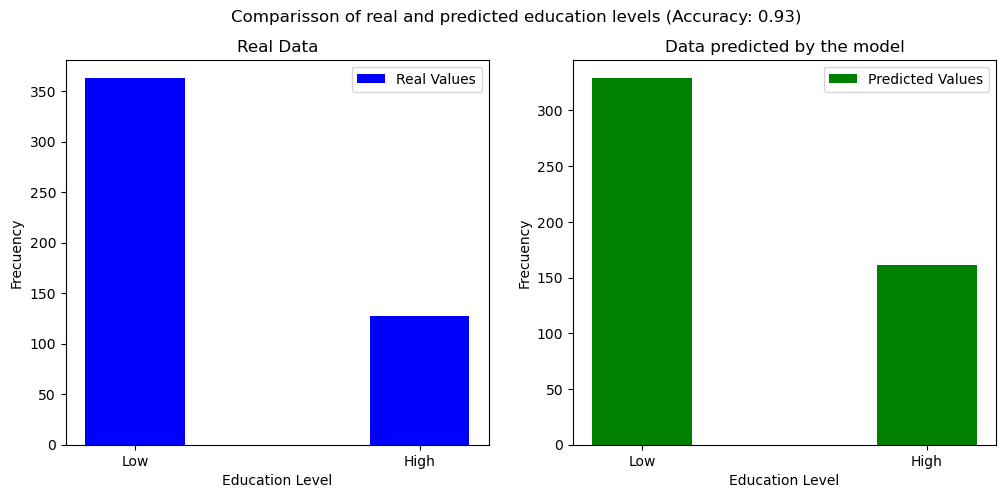

In [10]:
# Mapping of numerical labels
label_mapping = {1: 'High', 2: 'Low'}

# Change numerical values to categorical
real_labels = [label_mapping[num] for num in y_test]
predicted_labels = [label_mapping[num] for num in y_pred]

# Calculate the accuracy
accuracy = accuracy_score(real_labels, predicted_labels)

# Make a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Label the Categories (Education Level)
categories = ['Low', 'High']

# Count the frecuency in real and predicted data
real_frecuency = [real_labels.count(c) for c in categories]
predicted_frecuency = [predicted_labels.count(c) for c in categories]

# Bar width
bar_width = 0.35

# Position of bars in x axis
x = range(len(categories))

# Plot values in first subplot (real values)
ax1.bar(x, real_frecuency, width=bar_width, label='Real Values', color='b')

# Labels of categories in x axis
ax1.set_xticks(x)
ax1.set_xticklabels(categories)

# legend
ax1.legend()

# First grafic title
ax1.set_title('Real Data')

# Axis labels
ax1.set_xlabel('Education Level')
ax1.set_ylabel('Frecuency')

# Plot values of the second subplot (predicted values)
ax2.bar(x, predicted_frecuency, width=bar_width, label='Predicted Values', color='g')

# Labels of categories in x axis
ax2.set_xticks(x)
ax2.set_xticklabels(categories)

# legend
ax2.legend()

# Second grafic title
ax2.set_title('Data predicted by the model')

# Axis labels
ax2.set_xlabel('Education Level')
ax2.set_ylabel('Frecuency')

# General title
fig.suptitle(f'Comparisson of real and predicted education levels (Accuracy: {accuracy:.2f})')

# Show grapics
plt.show()

In [11]:
class EnhancedPerceptron:
    def __init__(self, learning_rate=0.01, num_epochs=1000):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.weights = None
        self.bias = None

    def train(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.random.randn(num_features) * 0.01
        self.bias = np.random.randn()
        y_encoded = np.where(y == 2, 0, 1)

        for epoch in range(self.num_epochs):
            # Shuffle data for each epoch
            indices = np.random.permutation(num_samples)
            X_shuffled = X[indices]
            y_shuffled = y_encoded[indices]
            
            for i in range(num_samples):
                linear_output = np.dot(X_shuffled[i], self.weights) + self.bias
                prediction = self.predict_category(linear_output)
                adjustment = self.learning_rate * (y_shuffled[i] - prediction)
                self.weights += adjustment * X_shuffled[i]
                self.bias += adjustment

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        predictions = [self.predict_category(output) for output in linear_output]
        predictions = [2 if pred == 0 else 1 for pred in predictions]
        return predictions

    def predict_category(self, output):
        return 1 if output >= 0 else 0

# Let's test the enhanced Perceptron
enhanced_perceptron = EnhancedPerceptron(learning_rate=0.01, num_epochs=2000)
enhanced_perceptron.train(X_train_standardized, y_train)
enhanced_y_pred = enhanced_perceptron.predict(X_test_standardized)
enhanced_accuracy = accuracy_score(y_test, enhanced_y_pred)

enhanced_accuracy

0.9755102040816327

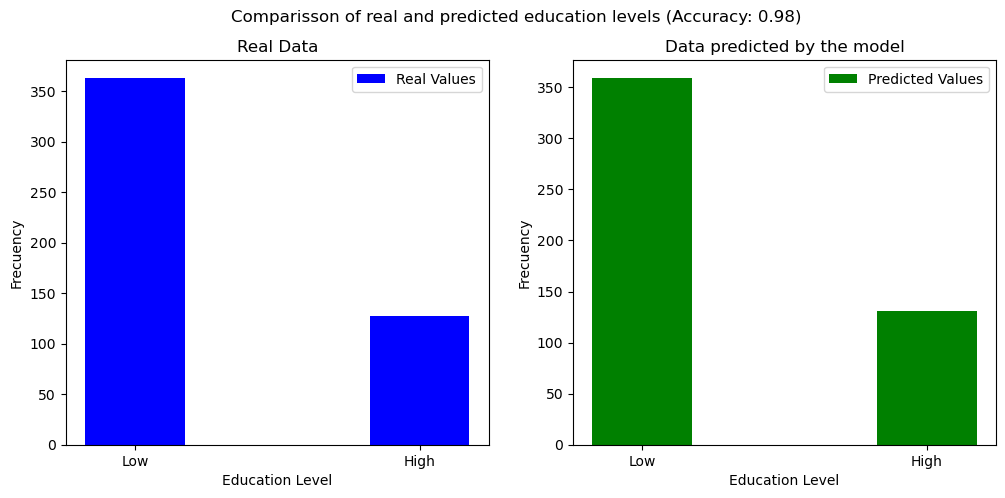

In [12]:
# Mapping of numerical labels
label_mapping = {1: 'High', 2: 'Low'}

# Change numerical values to categorical
real_labels = [label_mapping[num] for num in y_test]
predicted_labels = [label_mapping[num] for num in enhanced_y_pred]

# Calculate the accuracy
accuracy = accuracy_score(real_labels, predicted_labels)

# Make a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Label the Categories (Education Level)
categories = ['Low', 'High']

# Count the frecuency in real and predicted data
real_frecuency = [real_labels.count(c) for c in categories]
predicted_frecuency = [predicted_labels.count(c) for c in categories]

# Bar width
bar_width = 0.35

# Position of bars in x axis
x = range(len(categories))

# Plot values in first subplot (real values)
ax1.bar(x, real_frecuency, width=bar_width, label='Real Values', color='b')

# Labels of categories in x axis
ax1.set_xticks(x)
ax1.set_xticklabels(categories)

# legend
ax1.legend()

# First grafic title
ax1.set_title('Real Data')

# Axis labels
ax1.set_xlabel('Education Level')
ax1.set_ylabel('Frecuency')

# Plot values of the second subplot (predicted values)
ax2.bar(x, predicted_frecuency, width=bar_width, label='Predicted Values', color='g')

# Labels of categories in x axis
ax2.set_xticks(x)
ax2.set_xticklabels(categories)

# legend
ax2.legend()

# Second grafic title
ax2.set_title('Data predicted by the model')

# Axis labels
ax2.set_xlabel('Education Level')
ax2.set_ylabel('Frecuency')

# General title
fig.suptitle(f'Comparisson of real and predicted education levels (Accuracy: {accuracy:.2f})')

# Show grapics
plt.show()

In [13]:
# Create a KNN classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model to the standardized training data
knn.fit(X_train_standardized, y_train)

# Make predictions on the standardized test data
y_pred = knn.predict(X_test_standardized)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8938775510204081


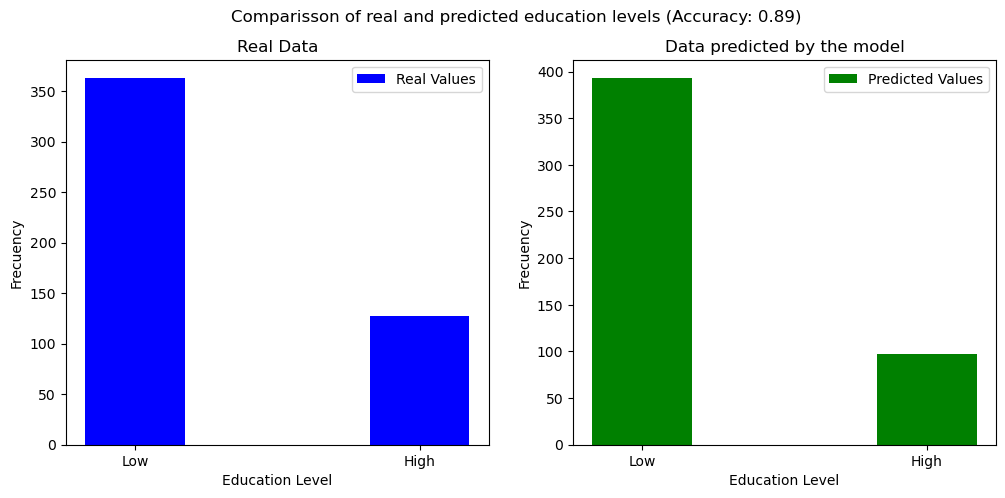

In [14]:
# Mapping of numerical labels
label_mapping = {1: 'High', 2: 'Low'}

# Change numerical values to categorical
real_labels = [label_mapping[num] for num in y_test]
predicted_labels = [label_mapping[num] for num in y_pred]

# Calculate the accuracy
accuracy = accuracy_score(real_labels, predicted_labels)

# Make a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Label the Categories (Education Level)
categories = ['Low', 'High']

# Count the frecuency in real and predicted data
real_frecuency = [real_labels.count(c) for c in categories]
predicted_frecuency = [predicted_labels.count(c) for c in categories]

# Bar width
bar_width = 0.35

# Position of bars in x axis
x = range(len(categories))

# Plot values in first subplot (real values)
ax1.bar(x, real_frecuency, width=bar_width, label='Real Values', color='b')

# Labels of categories in x axis
ax1.set_xticks(x)
ax1.set_xticklabels(categories)

# legend
ax1.legend()

# First grafic title
ax1.set_title('Real Data')

# Axis labels
ax1.set_xlabel('Education Level')
ax1.set_ylabel('Frecuency')

# Plot values of the second subplot (predicted values)
ax2.bar(x, predicted_frecuency, width=bar_width, label='Predicted Values', color='g')

# Labels of categories in x axis
ax2.set_xticks(x)
ax2.set_xticklabels(categories)

# legend
ax2.legend()

# Second grafic title
ax2.set_title('Data predicted by the model')

# Axis labels
ax2.set_xlabel('Education Level')
ax2.set_ylabel('Frecuency')

# General title
fig.suptitle(f'Comparisson of real and predicted education levels (Accuracy: {accuracy:.2f})')

# Show grapics
plt.show()

In [15]:
# Define the KNN function
def knn_predict(X_train, y_train, X_test, k=5):
    y_pred = []

    for test_point in X_test:
        # Calculate distances from the test point to all training points
        distances = [np.linalg.norm(test_point - train_point) for train_point in X_train]

        # Get indices of the k-nearest neighbors
        nearest_indices = np.argsort(distances)[:k]

        # Get the labels of the k-nearest neighbors
        nearest_labels = [y_train[i] for i in nearest_indices]

        # Predict the class by majority voting
        prediction = max(set(nearest_labels), key=nearest_labels.count)
        y_pred.append(prediction)

    return y_pred

# Define the accuracy function
def accuracy(y_true, y_pred):
    correct = sum(1 for a, b in zip(y_true, y_pred) if a == b)
    return correct / len(y_true)

# Use the knn_predict function to make predictions
y_pred_custom = knn_predict(X_train_standardized, y_train, X_test_standardized, k=5)

# Calculate and print the accuracy
accuracy_custom = accuracy(y_test, y_pred_custom)
print("Custom KNN Accuracy:", accuracy_custom)

Custom KNN Accuracy: 0.8938775510204081


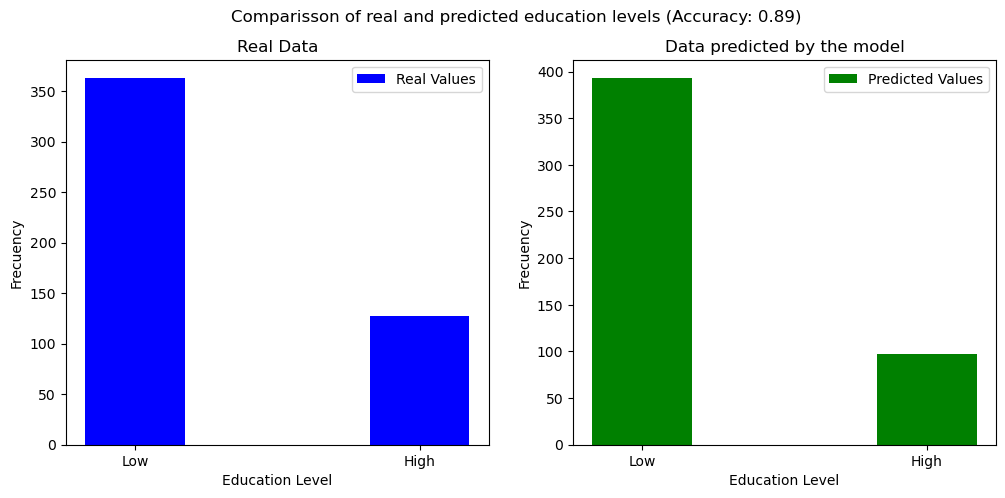

In [16]:
# Mapping of numerical labels
label_mapping = {1: 'High', 2: 'Low'}

# Change numerical values to categorical
real_labels = [label_mapping[num] for num in y_test]
predicted_labels = [label_mapping[num] for num in y_pred_custom]

# Calculate the accuracy
accuracy = accuracy_score(real_labels, predicted_labels)

# Make a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Label the Categories (Education Level)
categories = ['Low', 'High']

# Count the frecuency in real and predicted data
real_frecuency = [real_labels.count(c) for c in categories]
predicted_frecuency = [predicted_labels.count(c) for c in categories]

# Bar width
bar_width = 0.35

# Position of bars in x axis
x = range(len(categories))

# Plot values in first subplot (real values)
ax1.bar(x, real_frecuency, width=bar_width, label='Real Values', color='b')

# Labels of categories in x axis
ax1.set_xticks(x)
ax1.set_xticklabels(categories)

# legend
ax1.legend()

# First grafic title
ax1.set_title('Real Data')

# Axis labels
ax1.set_xlabel('Education Level')
ax1.set_ylabel('Frecuency')

# Plot values of the second subplot (predicted values)
ax2.bar(x, predicted_frecuency, width=bar_width, label='Predicted Values', color='g')

# Labels of categories in x axis
ax2.set_xticks(x)
ax2.set_xticklabels(categories)

# legend
ax2.legend()

# Second grafic title
ax2.set_title('Data predicted by the model')

# Axis labels
ax2.set_xlabel('Education Level')
ax2.set_ylabel('Frecuency')

# General title
fig.suptitle(f'Comparisson of real and predicted education levels (Accuracy: {accuracy:.2f})')

# Show grapics
plt.show()